Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

YOUR ANSWER HERE

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

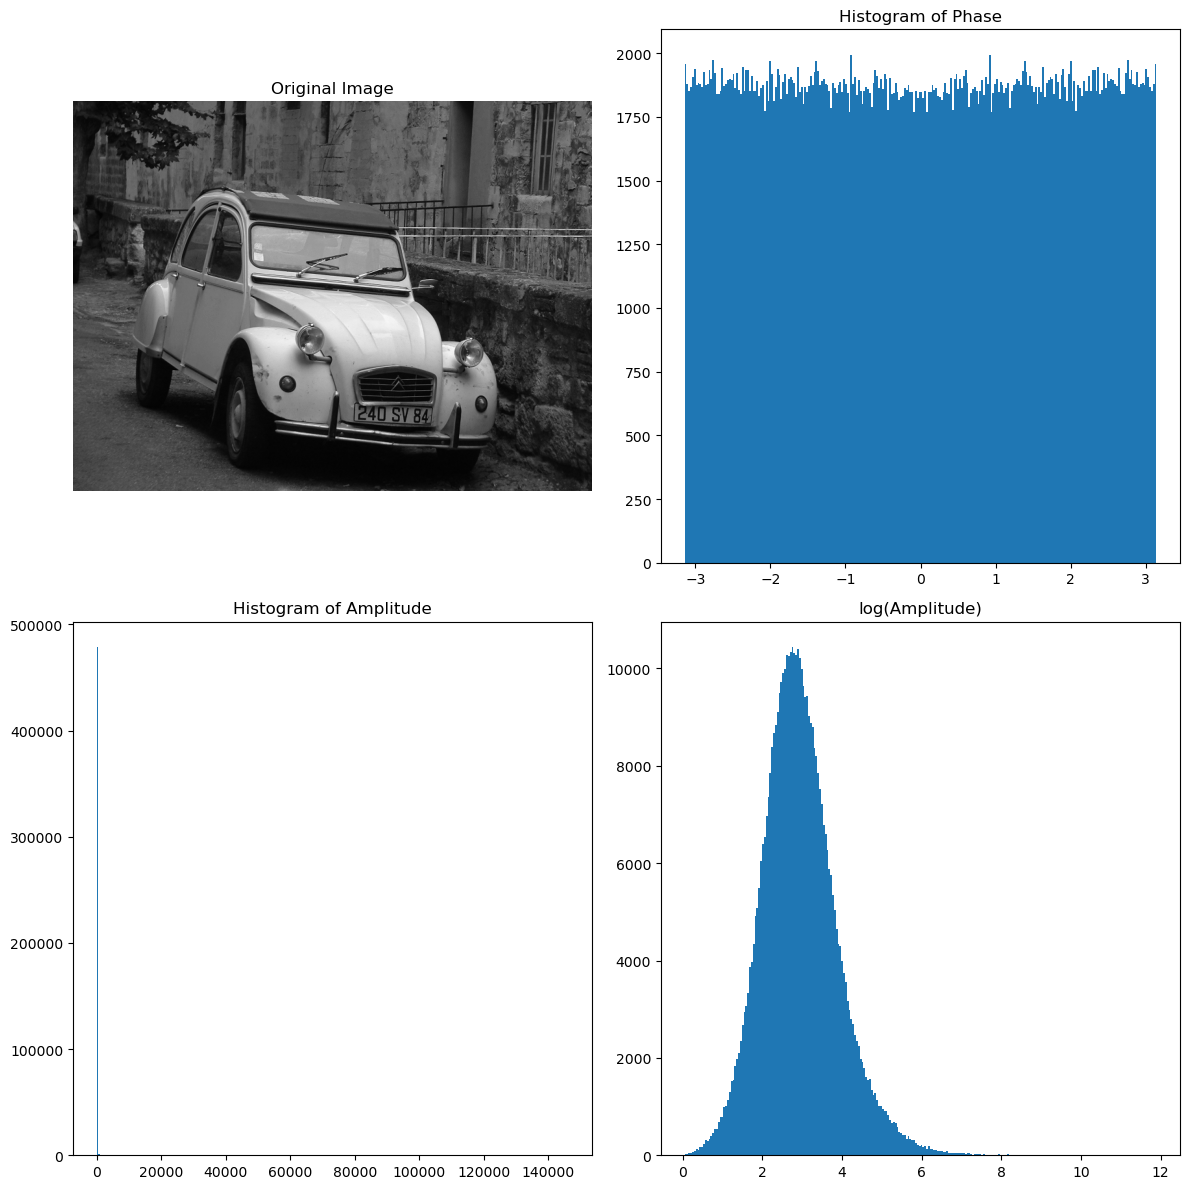

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('images/dolly.png')

# Perform the 2D Fourier transform
f = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

# Extract the amplitude and phase of the frequency components
amplitude = np.abs(fshift)
phase = np.angle(fshift)

# Apply a logarithmic transformation to the amplitude to enhance contrast
amplitude_log = np.log1p(amplitude)  # log(1 + amplitude)

# Create a figure with 4 subplots in a 2x2 layout
plt.figure(figsize=(12, 12))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the histogram of the phase values
plt.subplot(2, 2, 2)
plt.hist(phase.ravel(), bins=256, range=(-np.pi, np.pi))
plt.title('Histogram of Phase')

# Plot the histogram of the amplitude values
plt.subplot(2, 2, 3)
plt.hist(amplitude.ravel(), bins=256)
plt.title('Histogram of Amplitude')

# Plot the histogram of the log-transformed amplitude values
plt.subplot(2, 2, 4)
plt.hist(amplitude_log.ravel(), bins=256)

plt.title('log(Amplitude)')

plt.tight_layout()
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

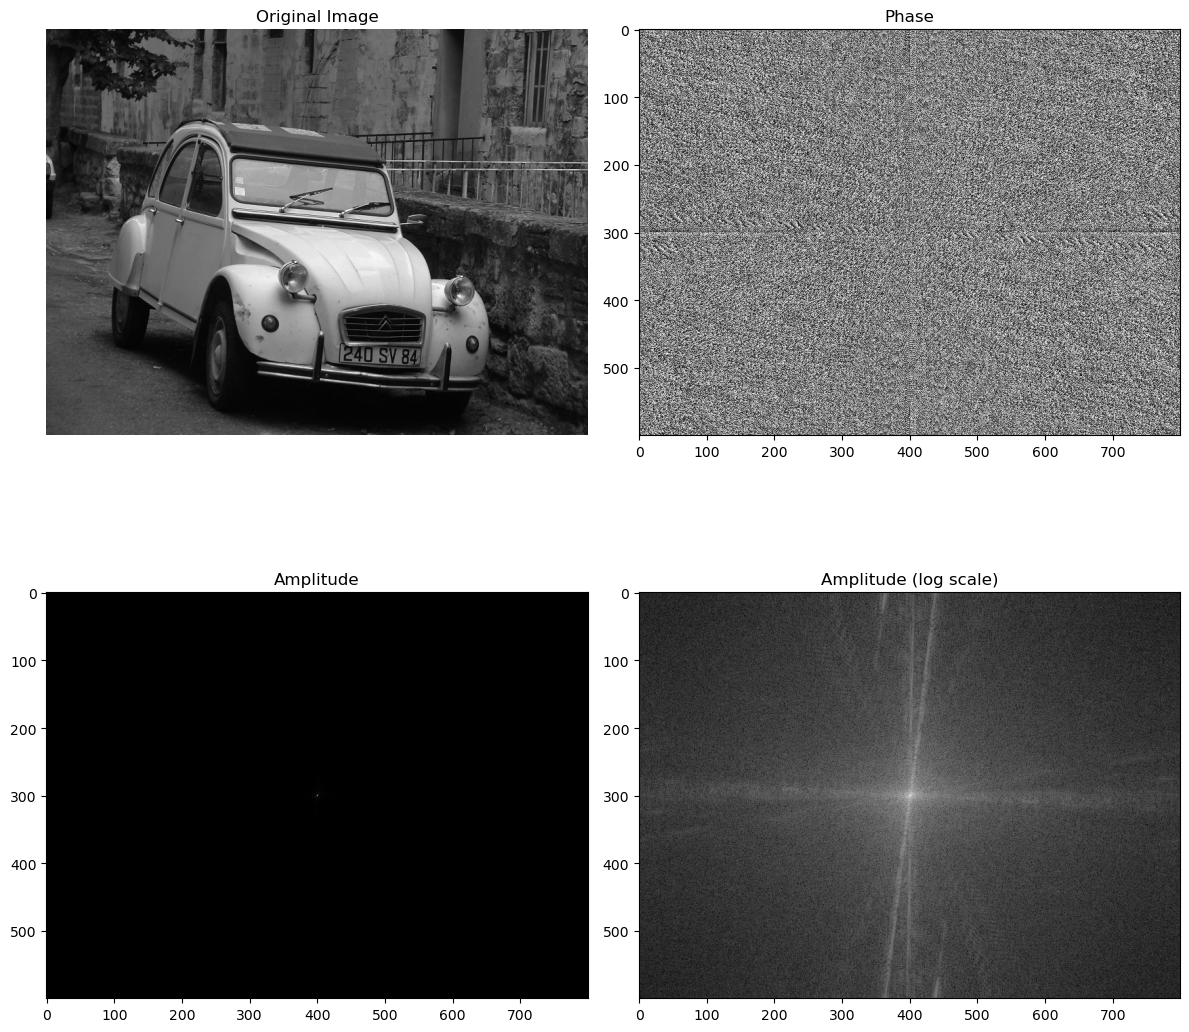

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('images/dolly.png')

# Perform the Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Compute amplitude and phase
amplitude = np.abs(fshift)
phase = np.angle(fshift)

# Apply logarithmic scaling to the amplitude
amplitude_log = np.log1p(amplitude)  # log(1 + amplitude)

# Display the results
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Phase
plt.subplot(2, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title('Phase')

# Amplitude (without logarithmic scaling)
plt.subplot(2, 2, 3)
plt.imshow(amplitude, cmap='gray')
plt.title('Amplitude')

# Amplitude (logarithmic scale)
plt.subplot(2, 2, 4)
plt.imshow(amplitude_log, cmap='gray')
plt.title('Amplitude (log scale)')

plt.tight_layout()
plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

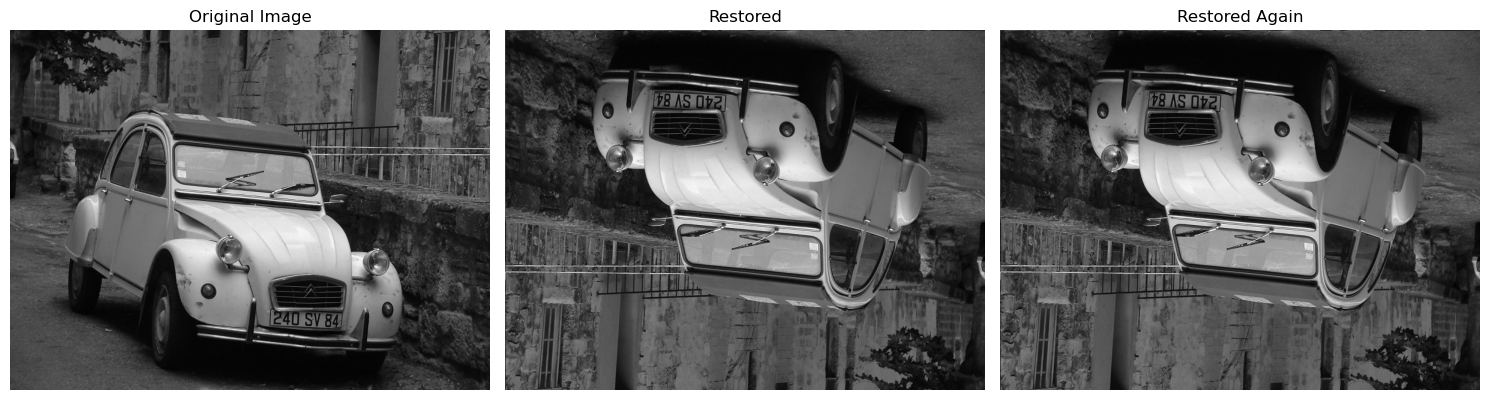

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = plt.imread('images/dolly.png')

# Perform the 2D Fourier transform
f = np.fft.fft2(img)
img_restore = np.fft.fft2(f)
img_restore_twice = np.fft.fft2(img)
img_restore_twice_twice = np.fft.fft2(img_restore_twice)


# Incorrect attempt to transform back using fft2 again (instead of ifft2)
# This will not properly invert the image. Instead, it typically results in a flipped version.
img_restore = np.real(img_restore)

# Apply fft2 once more to the incorrectly transformed image
# This should flip the image again.

img_restore_twice = np.real(img_restore)

img_restore_twice_twice=np.real(img_restore_twice)



# Display all three images side by side
plt.figure(figsize=(15,5))

# 1. Original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2.  Restored image (flipped once)
plt.subplot(1, 3, 2)
plt.imshow(img_restore, cmap='gray')
plt.title('Restored')
plt.axis('off')

# 3. Restored image again (flipped once more)
plt.subplot(1, 3, 3)
plt.imshow(img_restore_twice_twice, cmap='gray')
plt.title('Restored Again')
plt.axis('off')

plt.tight_layout()
plt.show()

YOUR ANSWER HERE

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

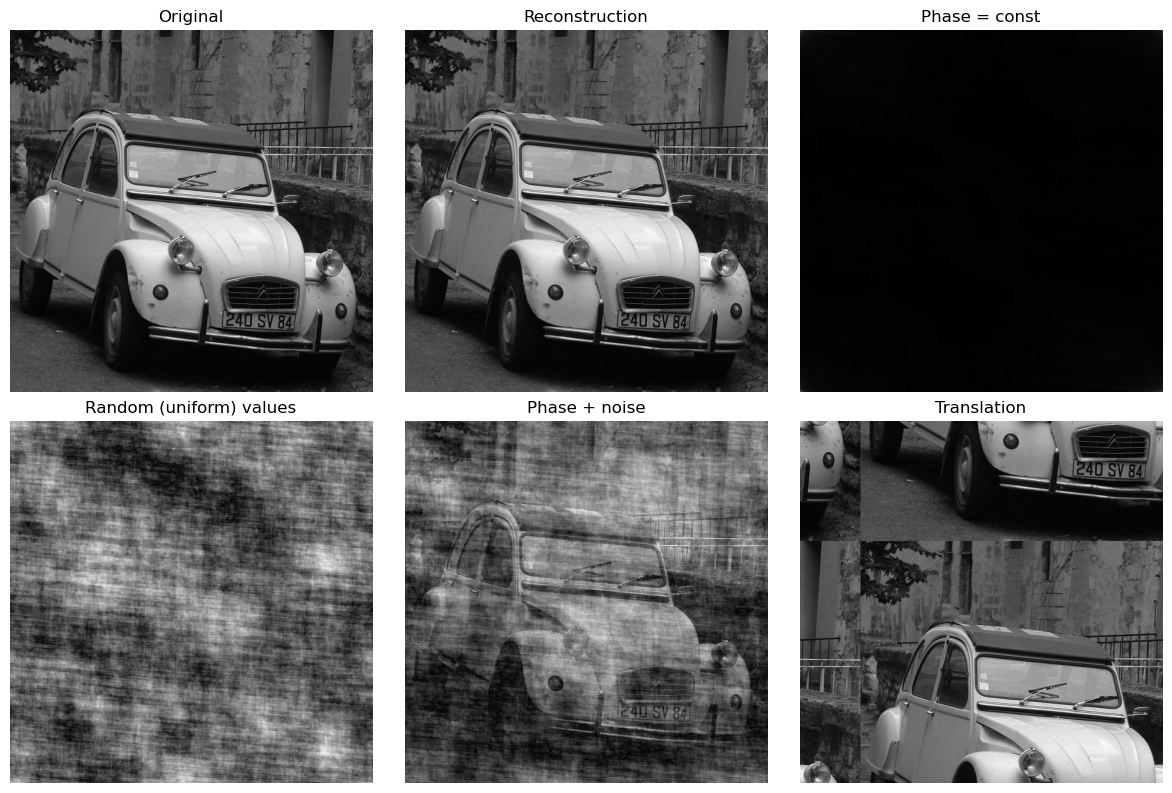

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the image
img = plt.imread('images/dollySquared.jpg')
if img.ndim == 3:
    img = img.mean(axis=2)  # Convert to grayscale if RGB

# Compute the Fourier transform
ft = np.fft.fft2(img)

# Extract amplitude and phase
amplitude = np.abs(ft)
original_phase = np.angle(ft)

# 1. Original
original = img

# 2. Reconstruction (amplitude + original phase)
ft_reconstruction = amplitude * np.exp(1j * original_phase)
reconstruction = np.fft.ifft2(ft_reconstruction)
reconstruction = np.abs(reconstruction)

# 3. Phase = const (0)
const_phase = np.zeros_like(original_phase)
ft_const_phase = amplitude * np.exp(1j * const_phase)
const_phase_img = np.fft.ifft2(ft_const_phase)
const_phase_img = np.abs(const_phase_img)

# 4. Random (uniform) phase
random_phase = 2 * np.pi * np.random.rand(*original_phase.shape)
ft_random_phase = amplitude * np.exp(1j * random_phase)
random_phase_img = np.fft.ifft2(ft_random_phase)
random_phase_img = np.abs(random_phase_img)

# 5. Phase + noise
noise_level = 0.5
noisy_phase = original_phase + noise_level * (2 * np.pi * np.random.rand(*original_phase.shape) - np.pi)
ft_noisy_phase = amplitude * np.exp(1j * noisy_phase)
noisy_phase_img = np.fft.ifft2(ft_noisy_phase)
noisy_phase_img = np.abs(noisy_phase_img)

# 6. Translation with a larger shift
dx, dy = 200, 100  # Increased shifts for a more pronounced translation
M, N = img.shape
u = np.fft.fftfreq(M) * M
v = np.fft.fftfreq(N) * N
U, V = np.meshgrid(u, v, indexing='ij')
translation_phase = np.exp(-2j * np.pi * ((U * dx / M) + (V * dy / N)))
ft_translation = ft * translation_phase
translation_img = np.fft.ifft2(ft_translation)
translation_img = np.abs(translation_img)

# Display results in a 2x3 grid
plt.figure(figsize=(12,8))

plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(reconstruction, cmap='gray')
plt.title('Reconstruction')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(const_phase_img, cmap='gray')
plt.title('Phase = const')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(random_phase_img, cmap='gray')
plt.title('Random (uniform) values')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(noisy_phase_img, cmap='gray')
plt.title('Phase + noise')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(translation_img, cmap='gray')
plt.title('Translation')
plt.axis('off')

plt.tight_layout()
plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


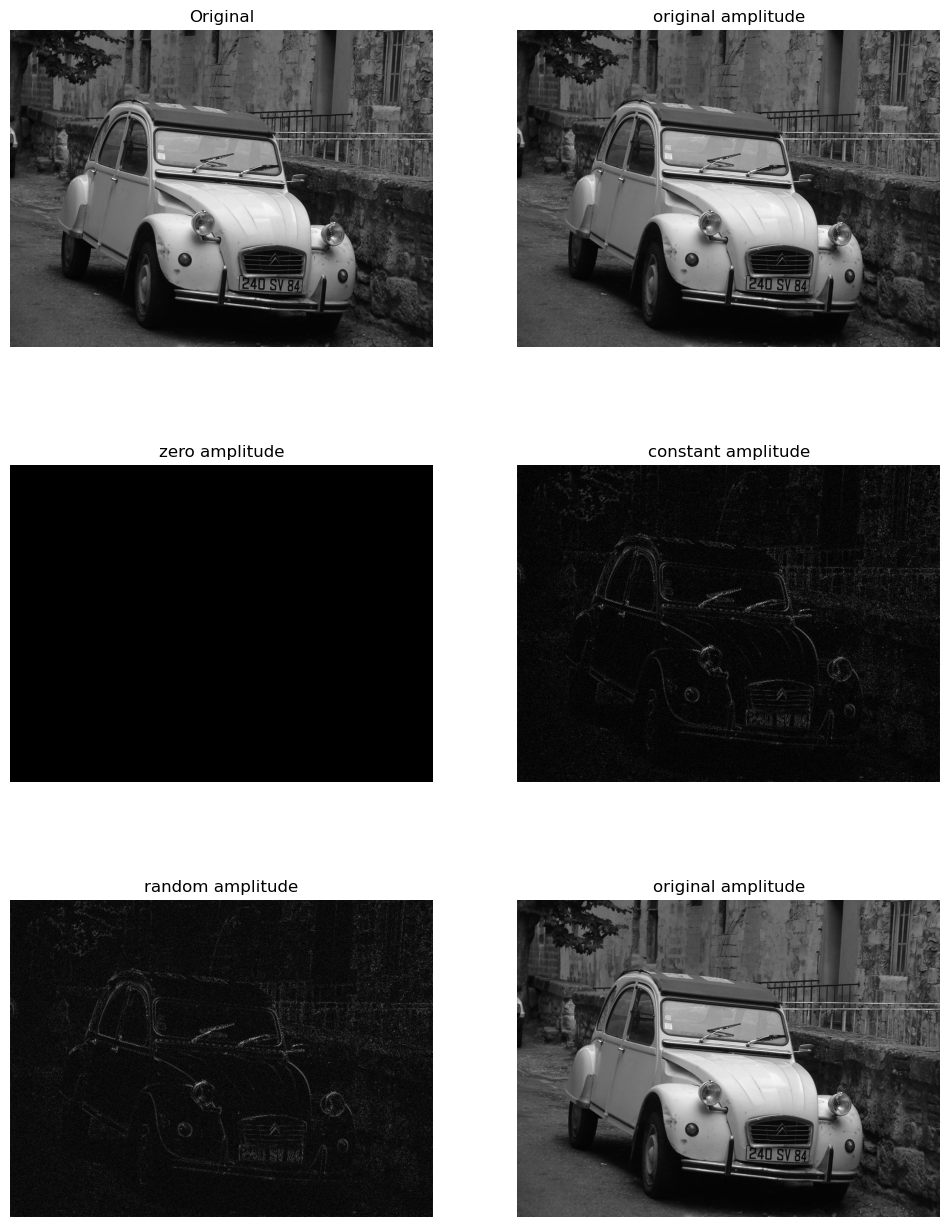

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

When the phase is fixed but amplitude is modified, the fundamental structure (edges, outlines) of the image remains visible because it is encoded in the phase. Changing the amplitude affects brightness and contrast. Using constant or random amplitudes makes the image look flatter or more chaotic. Slight noise in the amplitude still preserves recognizable features, but adds graininess.

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

YOUR ANSWER HERE

The Fourier transform is a mathematical tool that breaks down a signal (for example, a 1D function, an image, or any form of data that varies over space or time) into a set of simpler, underlying components called frequencies. Instead of looking at how the signal changes over time or space directly, it allows you to view the signal in terms of how much it’s made up of rapid variations (high frequencies) and slow variations (low frequencies).

Frequency space (also called the frequency domain) is the viewpoint gained after applying the Fourier transform. Instead of describing the signal in terms of its original input coordinate (like time for a sound wave or spatial coordinates for an image), the frequency space describes the signal by how strongly it contains each possible frequency.

A single point in frequency space represents the contribution of a particular frequency (or a small range of frequencies) to the overall signal. Its position determines which frequency is being described, and the value at that point (often represented as a complex number) tells you the strength (amplitude) and the starting offset (phase) of that frequency component within the original signal.

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

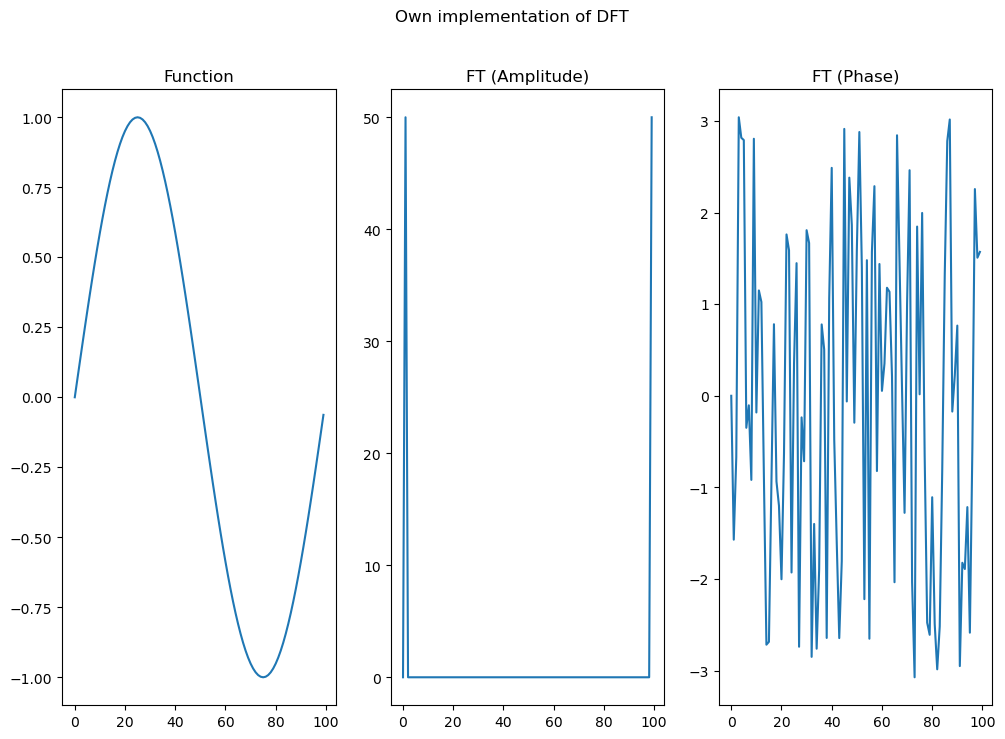

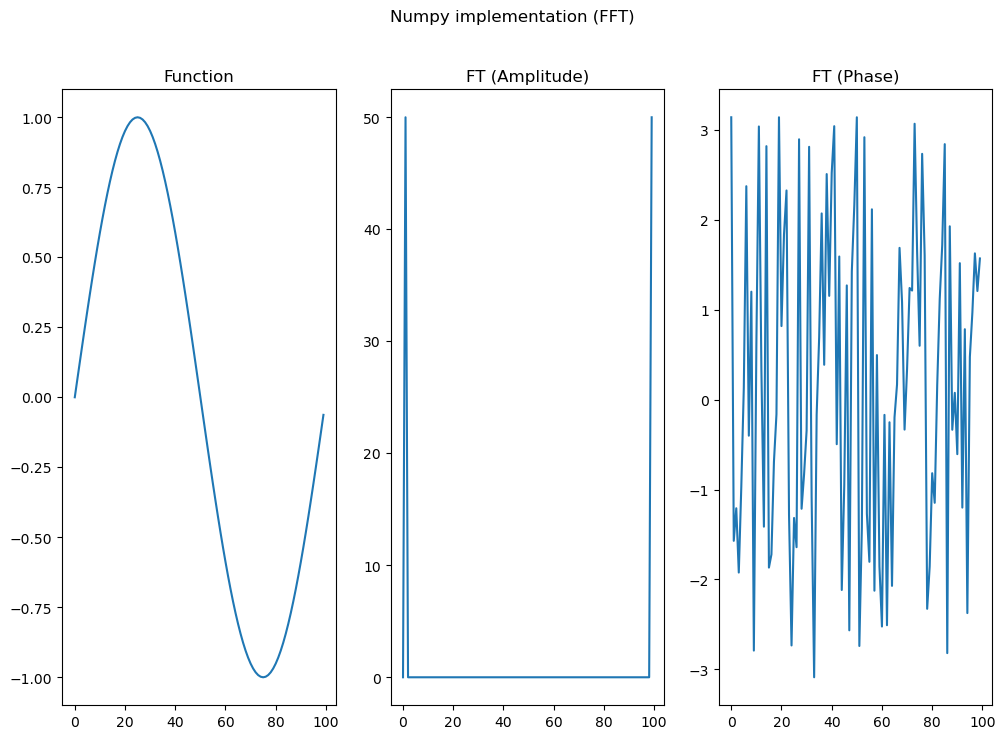

In [13]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    L = len(func)
    ft = np.zeros(L, dtype=complex)
    
    # Implementing the formula:
    # c_n = sum_{x=0}^{L-1} f(x) * exp(-2π i n x / L)
    for n in range(L):
        for x in range(L):
            ft[n] += func[x] * np.exp(-2j * np.pi * n * x / L)
    
    return ft

# number of points
L = np.arange(100)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Choose a test function (e.g., a sine wave)
func = np.sin(2 * np.pi * L / len(L))
# Alternatively, uncomment one of the following lines to test different functions:
# func = np.zeros(L.shape); func[40:60] = 1
# func = gaussian(L, 0, 10)

# Our own DFT implementation
ft_own = fourier1d(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation of DFT')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft_own)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft_own)); plt.title('FT (Phase)')
plt.show()

# Numpy's FFT implementation for comparison
ft_np = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft_np)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft_np)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

Custom vectorized DFT took 0.08 seconds.


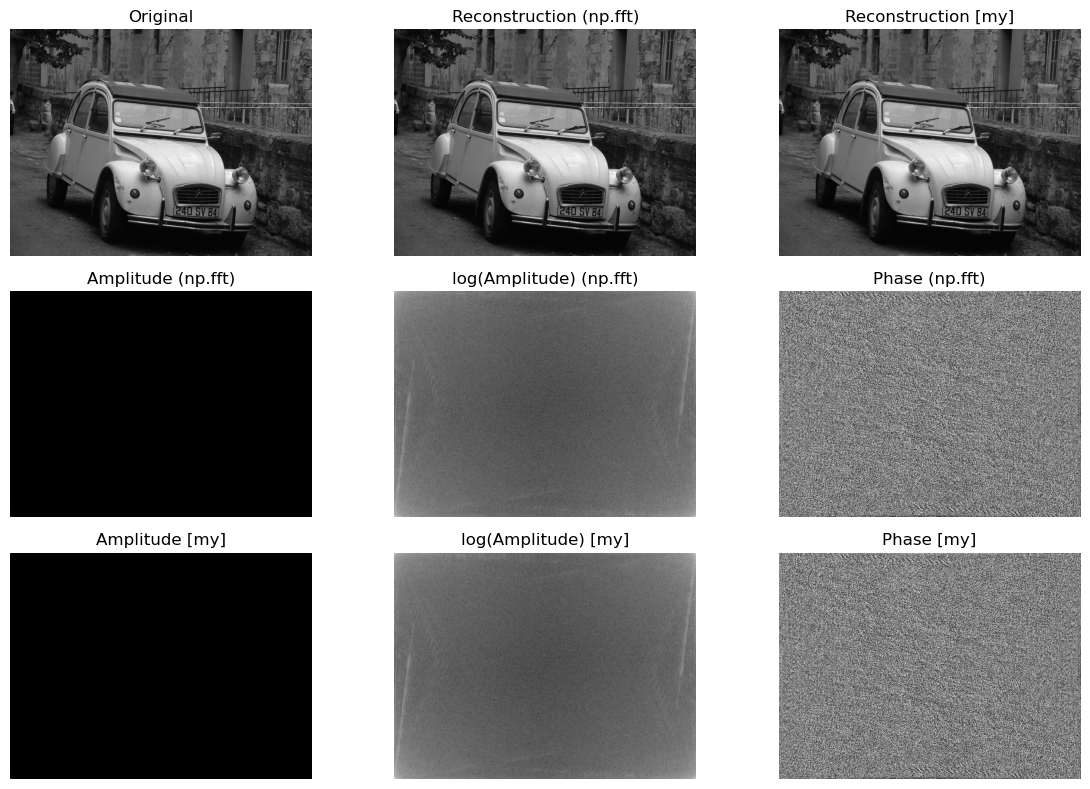

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

def fourier2d_naive(img):
    """
    Compute the 2D DFT using four nested loops (naive approach).
    Extremely slow for large images.
    
    Args:
        img (ndarray): 2D grayscale image.
    
    Returns:
        ndarray (complex): The 2D Fourier transform of the input image.
    """
    M, N = img.shape
    ft = np.zeros((M, N), dtype=complex)
    
    # Direct implementation of the definition:
    # F(u, v) = Σ_x=0^{M-1} Σ_y=0^{N-1} f(x, y)*exp(-2πi(u*x/M + v*y/N))
    for u in range(M):
        for v in range(N):
            sum_val = 0.0
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_val += img[x, y] * np.exp(exponent)
            ft[u, v] = sum_val
            
    return ft

def fourier2d_vectorized(img):
    """
    Compute the 2D DFT using vectorized operations.
    Still O(M²N²) complexity, but uses NumPy broadcasting.
    This might still be extremely slow for large images.
    
    Args:
        img (ndarray): 2D grayscale image.
    
    Returns:
        ndarray (complex): The 2D Fourier transform of the input image.
    """
    M, N = img.shape
    
    # Create arrays for coordinates
    x = np.arange(M)
    y = np.arange(N)
    
    # Compute the exponent for all pairs (u,x) and (v,y) using broadcasting
    # For each u, x_exp[u,x] = exp(-2πi(u*x/M))
    # For each v, y_exp[v,y] = exp(-2πi(v*y/N))
    x_exp = np.exp(-2j * np.pi * (x[:, None] / M) * np.arange(M)[None, :])
    y_exp = np.exp(-2j * np.pi * (y[:, None] / N) * np.arange(N)[None, :])
    
    # We need to combine them for all (u,v): 
    # F(u,v) = sum over x,y: f(x,y)*exp(-2πi(u*x/M))*exp(-2πi(v*y/N))
    # After computing expansions, we have to carefully rearrange and multiply.
    
    # One way is to note:
    # F(u,v) = sum_x [f(x,y)*exp(-2πi(u*x/M)) over x] * (then sum over y with exp(-2πi(v*y/N)))
    # But directly doing this in a fully vectorized manner still involves large intermediate arrays.
    
    # Let's break it down step-by-step:
    ft = np.zeros((M, N), dtype=complex)
    
    # Compute the transform along one dimension first (e.g. x), then along the other (y).
    # First, transform along x for each row separately:
    # G(u,y) = Σ_x f(x,y)*exp(-2πi(u*x/M))
    # shape: G(u,y)
    G = x_exp @ img  # matrix multiplication: (M,M) @ (M,N) -> (M,N)
    # x_exp[u,x] * f(x,y), sum over x
    
    # Now, we still need to multiply this by the exponent in y and sum over y:
    # F(u,v) = Σ_y G(u,y)*exp(-2πi(v*y/N))
    # We can do a matrix multiplication in the y dimension by transposing appropriately.
    
    # Re-arrange so we can multiply along y:
    # G(u,y) is (M,N), we want to multiply by y_exp[v,y] and sum over y
    # y_exp[v,y] is (N,N), so we do G(u,y) * y_exp^T(y,v) to sum over y
    F = G @ y_exp.T  # (M,N) @ (N,N) -> (M,N)
    
    return F

# Load the full image (be aware this might be slow!)
img = plt.imread('/Users/antonrusakov/Library/UniOsna/ComputerVision/Sheet05/images/dolly.png')

# If the image is colored (RGB), convert it to grayscale
if img.ndim == 3:
    img = img.mean(axis=2)

# Attempt to run the vectorized version on the full image
# WARNING: This may still be very slow for large images!
start_time = time.time()
my_ft = fourier2d_vectorized(img)
end_time = time.time()
print(f"Custom vectorized DFT took {end_time - start_time:.2f} seconds.")

# Compute FFT using NumPy for comparison
np_ft = np.fft.fft2(img)

# Extract amplitude and phase from both transforms
my_amplitude = np.abs(my_ft)
my_phase = np.angle(my_ft)

amplitude = np.abs(np_ft)
phase = np.angle(np_ft)

# Reconstruct the image from our transform using inverse FFT
my_reconstructed = np.fft.ifft2(my_ft)
reconstructed = np.fft.ifft2(np_ft)

plt.figure(figsize=(12, 8))
plt.gray()

plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(np.abs(reconstructed)); plt.title('Reconstruction (np.fft)')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(np.abs(my_reconstructed)); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude (np.fft)')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude + 1e-5)); plt.title('log(Amplitude) (np.fft)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase (np.fft)')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude + 1e-5)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.tight_layout()
plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

YOUR ANSWER HERE

The convolution theorem states that the Fourier transform of a convolution of two functions is the product of their individual Fourier transforms. In other words,

$$ \mathcal{F}\{f * g\} = \mathcal{F}\{f\} \cdot \mathcal{F}\{g\}.$$


Practical consequences:
	•	Convolution operations, which can be computationally expensive in the spatial domain, become simple multiplications in the frequency domain.
	•	This enables efficient computation of convolutions, especially for large signals or images, by using the Fast Fourier Transform (FFT) to switch domains, perform a simple multiplication, and then transform back.
	•	As a result, image filtering, signal processing, and many related tasks can be done more quickly and efficiently.


**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

YOUR ANSWER HERE

English:
From the perspective of Fourier analysis, the natural approach is to assume periodic boundary conditions. In other words, the image (or signal) is treated as if it “wraps around” at the edges, so that a pixel on the right boundary is conceptually adjacent to a pixel on the left boundary, and similarly for the top and bottom edges. This periodic assumption matches the inherently periodic nature of the Fourier transform domain.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


YOUR ANSWER HERE

Using the convolution theorem, the complexity of computing a convolution is dominated by the cost of the Fast Fourier Transform (FFT). For an input of size  $ N $ , the FFT typically runs in $ O(N \log N)$ . Thus, convolution using the convolution theorem (FFT → multiply → inverse FFT) also takes about $ O(N \log N) $.

In contrast, the direct method of convolution typically takes $ O(N^2) $ operations for a naive implementation, since each output value requires summing over a neighborhood of input values.

In summary:

•	Using the convolution theorem (FFT-based):  $ O(N \log N) $ 

•	Direct convolution (naive): $ O(N^2) $

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

YOUR ANSWER HERE

Below is a sketch of the proof for the discrete 2D case, following the idea of the continuous proof and adapting it to discrete indices. The key steps are re-indexing the sums and using the definition of the Discrete Fourier Transform (DFT).

Idea:

•	Start with the definition of the convolution and plug it into the definition of the Fourier transform.

•	Interchange the summations and carefully re-index to separate terms involving  f  and  h .

•	Recognize the definitions of the Fourier transforms of  f  and  h , and show that you get their product.


---

Let $ f, h $ be two discrete 2D functions defined on a $ M \times N $ grid (often considered periodically, so indexing is modulo M in the x-direction and modulo N in the y-direction). The convolution $ (f * h)(x,y) $ is defined as:


$$ (f * h)(x,y) = \sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) \cdot h(x - x{\prime}, y - y{\prime}) $$


Here, $ (x - x{\prime})  and  (y - y{\prime}) $ are taken modulo $ M$  and $ N$  respectively, reflecting the periodic boundary conditions that naturally arise in the discrete Fourier framework.

Now consider the 2D Fourier transform $\mathcal{F}f * h $:


$ \mathcal{F}f * h = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1} (f * h)(x,y) \cdot e^{-\mathrm{i}2\pi\left(u\frac{x}{M} + v\frac{y}{N}\right)} $.


Substitute the definition of $ (f * h)(x,y) $:


$\mathcal{F}f * h = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1} \left(\sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) h(x - x{\prime}, y - y{\prime})\right) e^{-\mathrm{i}2\pi\left(u\frac{x}{M} + v\frac{y}{N}\right)} $.


We can interchange the order of summation (this is allowed since the sums are finite):


$ \mathcal{F}f * h = \sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) \sum_{x=0}^{M-1}\sum_{y=0}^{N-1} h(x - x{\prime}, y - y{\prime}) e^{-\mathrm{i}2\pi\left(u\frac{x}{M}+v\frac{y}{N}\right)} $ .


Next, perform a change of variables in the inner sums. Let $ X = x - x{\prime} $ and $ Y = y - y{\prime} $ . As x runs from $ 0 $ to $M-1$ , and y from $0$ to $N-1$, so do $X $ and $Y$ (just in a different order, but since we sum over a full period, the order does not matter due to periodicity):


$ \mathcal{F}f * h = \sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) \sum_{X=0}^{M-1}\sum_{Y=0}^{N-1} h(X,Y) e^{-\mathrm{i}2\pi\left(u\frac{X+x{\prime}}{M}+v\frac{Y+y{\prime}}{N}\right)} $.


Now separate the exponentials:


= $ \sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) e^{-\mathrm{i}2\pi\left(u\frac{x{\prime}}{M}+v\frac{y{\prime}}{N}\right)} \sum_{X=0}^{M-1}\sum_{Y=0}^{N-1} h(X,Y) e^{-\mathrm{i}2\pi\left(u\frac{X}{M}+v\frac{Y}{N}\right)} $.


Notice that the factor involving $ X,Y $ is independent of $ x{\prime},y{\prime} $ and the factor involving $ x{\prime},y{\prime} $ is independent of $ X,Y $ . Thus we have:


$ \mathcal{F}f * h = \left(\sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) e^{-\mathrm{i}2\pi\left(u\frac{x{\prime}}{M}+v\frac{y{\prime}}{N}\right)}\right) \cdot \left(\sum_{X=0}^{M-1}\sum_{Y=0}^{N-1} h(X,Y) e^{-\mathrm{i}2\pi\left(u\frac{X}{M}+v\frac{Y}{N}\right)}\right) $.


Recognize each big parenthesis as a Fourier transform:


$ \mathcal{F}f = \sum_{x{\prime}=0}^{M-1}\sum_{y{\prime}=0}^{N-1} f(x{\prime},y{\prime}) e^{-\mathrm{i}2\pi\left(u\frac{x{\prime}}{M}+v\frac{y{\prime}}{N}\right)} $ ,


$ \mathcal{F}h = \sum_{X=0}^{M-1}\sum_{Y=0}^{N-1} h(X,Y) e^{-\mathrm{i}2\pi\left(u\frac{X}{M}+v\frac{Y}{N}\right)} $.


Thus:


$ \mathcal{F}f * h = \mathcal{F}f \cdot \mathcal{F}h $.
